In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# does not need to be imported there. You can execute this cell if you want to know if you have the right version of tensorflow
import tensorflow as tf
tf.__version__

'2.15.0'

# Problematic of our dataset : revenues based upon the online shoppers intention

### goal : to analyse the dataset, and be able to predict if a consumer is going to pay or not

Key elements of the dataset : 
- 17 features, 1 label
- label : revenue (boolean)
- features : 4 categorical, 13 numerical

In [6]:
dataset = pd.read_csv("online_shoppers_intention.csv")
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Data Processing

In [8]:
# imputation of null values
dataset.dropna(inplace=True) # no null values found
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
#normalizing the dataset with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']] = scaler.fit_transform(dataset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']])

In [10]:
dataset[["BounceRates", "ExitRates", "PageValues", "SpecialDay"]] = scaler.fit_transform(dataset[["BounceRates", "ExitRates", "PageValues", "SpecialDay"]])

In [11]:
dataset.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0,0.0,2,0.000516,0.000000,0.500000,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
96,0,0.0,0,0.0,6,0.024487,0.250000,0.333333,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
97,0,0.0,0,0.0,4,0.001641,0.000000,0.125000,0.0,0.6,Feb,1,1,1,4,Returning_Visitor,False,False
98,0,0.0,1,0.0,7,0.000782,0.190476,0.404762,0.0,0.6,Feb,2,4,1,7,Returning_Visitor,False,False


In [12]:
# replacing months with the conrresponding number 
dataset['Month'] = dataset['Month'].replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [13]:
# categorization of VisitorType, weekend and Revenue
dataset['VisitorType'] = dataset['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[1,2,3])
dataset['Weekend'] = dataset['Weekend'].replace([True,False],[1,0])
dataset['Revenue'] = dataset['Revenue'].replace([True,False],[1,0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
# dividing the dataset into features and labels

features = dataset.drop('Revenue', axis=1)
labels = dataset['Revenue']
labels = labels.replace([True, False], [1, 0])
labels = labels.astype('int')
np_labels = np.array(labels) # we convert into numpy arrays because tensorflow works with numpy arrays
np_features = np.array(features) # we convert into numpy arrays because tensorflow works with numpy arrays
np_features = np_features.astype('float')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
#save the dataset for our api, so we don't have to do the preprocessing again
np.savez_compressed('dataset.npz', features=np_features, labels=np_labels)

In [18]:
# check the names of the columns to copy it in the api
dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# Visualizing

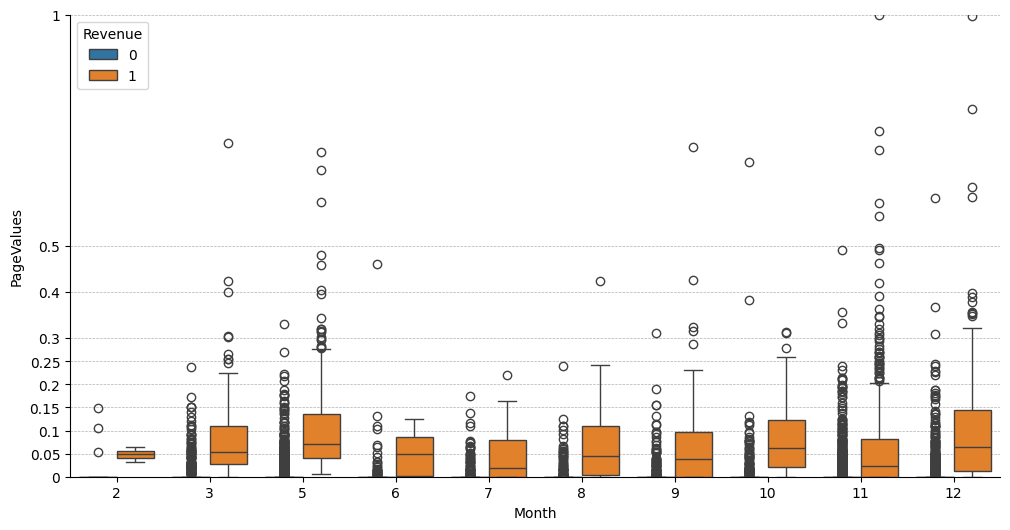

In [19]:
# view a correlation between pageValues, Month and Revenues

plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Month', y='PageValues', hue='Revenue')
ax = plt.gca()
ax.set_ylim(bottom=0, top=0.25)
ax.yaxis.set_ticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1])
ax.yaxis.set_ticklabels(['0', '0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.4', '0.5', '1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

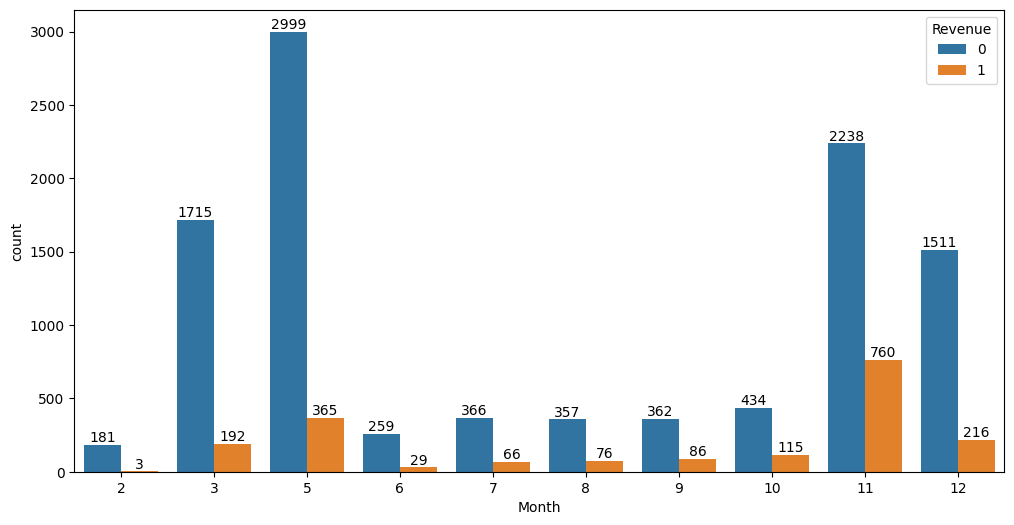

In [20]:
# sum of Revenues per month
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Month', hue='Revenue')
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()

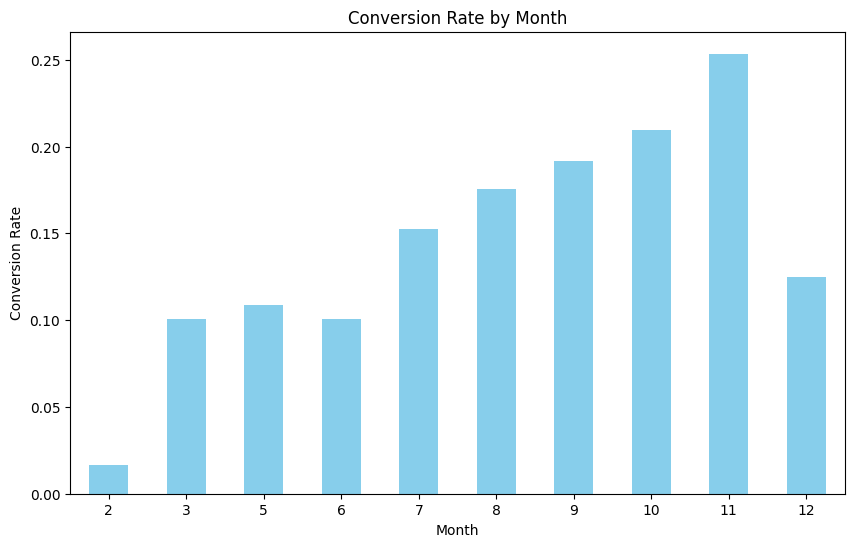

In [22]:
# mean of Revenues per month
plt.figure(figsize=(10, 6))
conversion_by_month = dataset.groupby('Month')['Revenue'].mean()
conversion_by_month.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

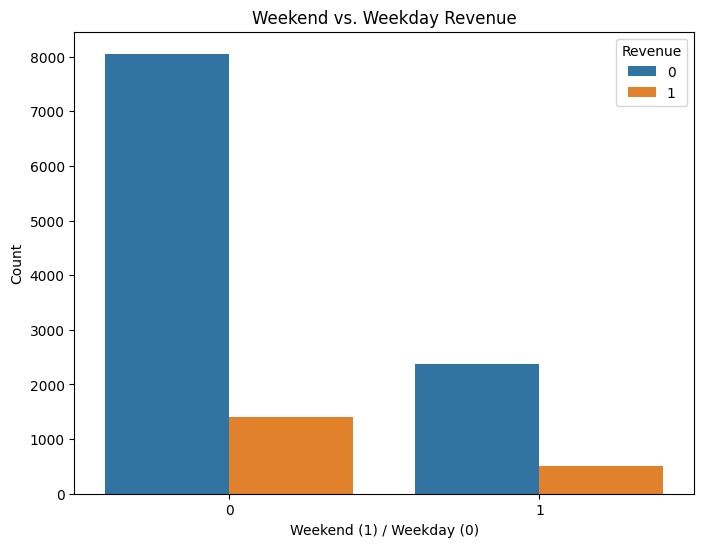

In [24]:
#comparison weekend vs weekday
plt.figure(figsize=(8, 6))
sns.countplot(x='Weekend', hue='Revenue', data=dataset)
plt.title('Weekend vs. Weekday Revenue')
plt.xlabel('Weekend (1) / Weekday (0)')
plt.ylabel('Count')
plt.show()

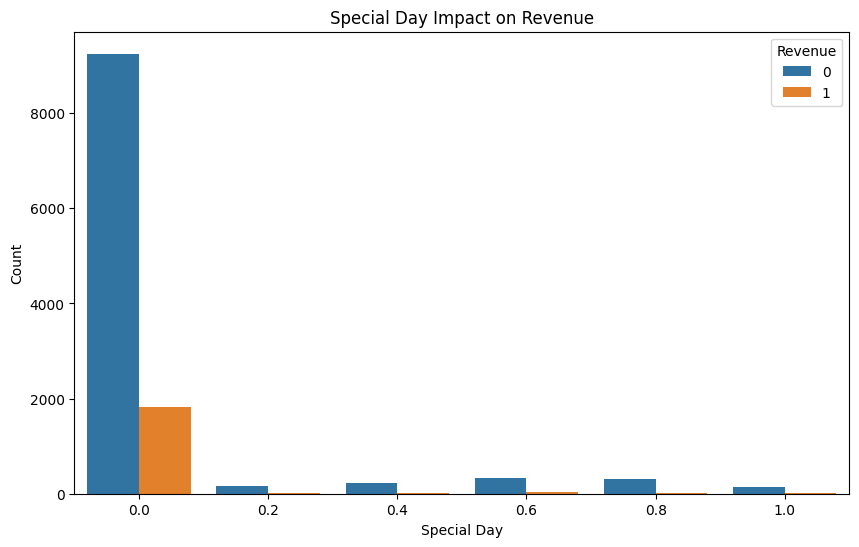

In [27]:
#type of specialday for revenues
# NOTE : the dataset does not provide the meaning of the special days
plt.figure(figsize=(10, 6))
sns.countplot(x='SpecialDay', hue='Revenue', data=dataset)
plt.title('Special Day Impact on Revenue')
plt.xlabel('Special Day')
plt.ylabel('Count')
plt.show()

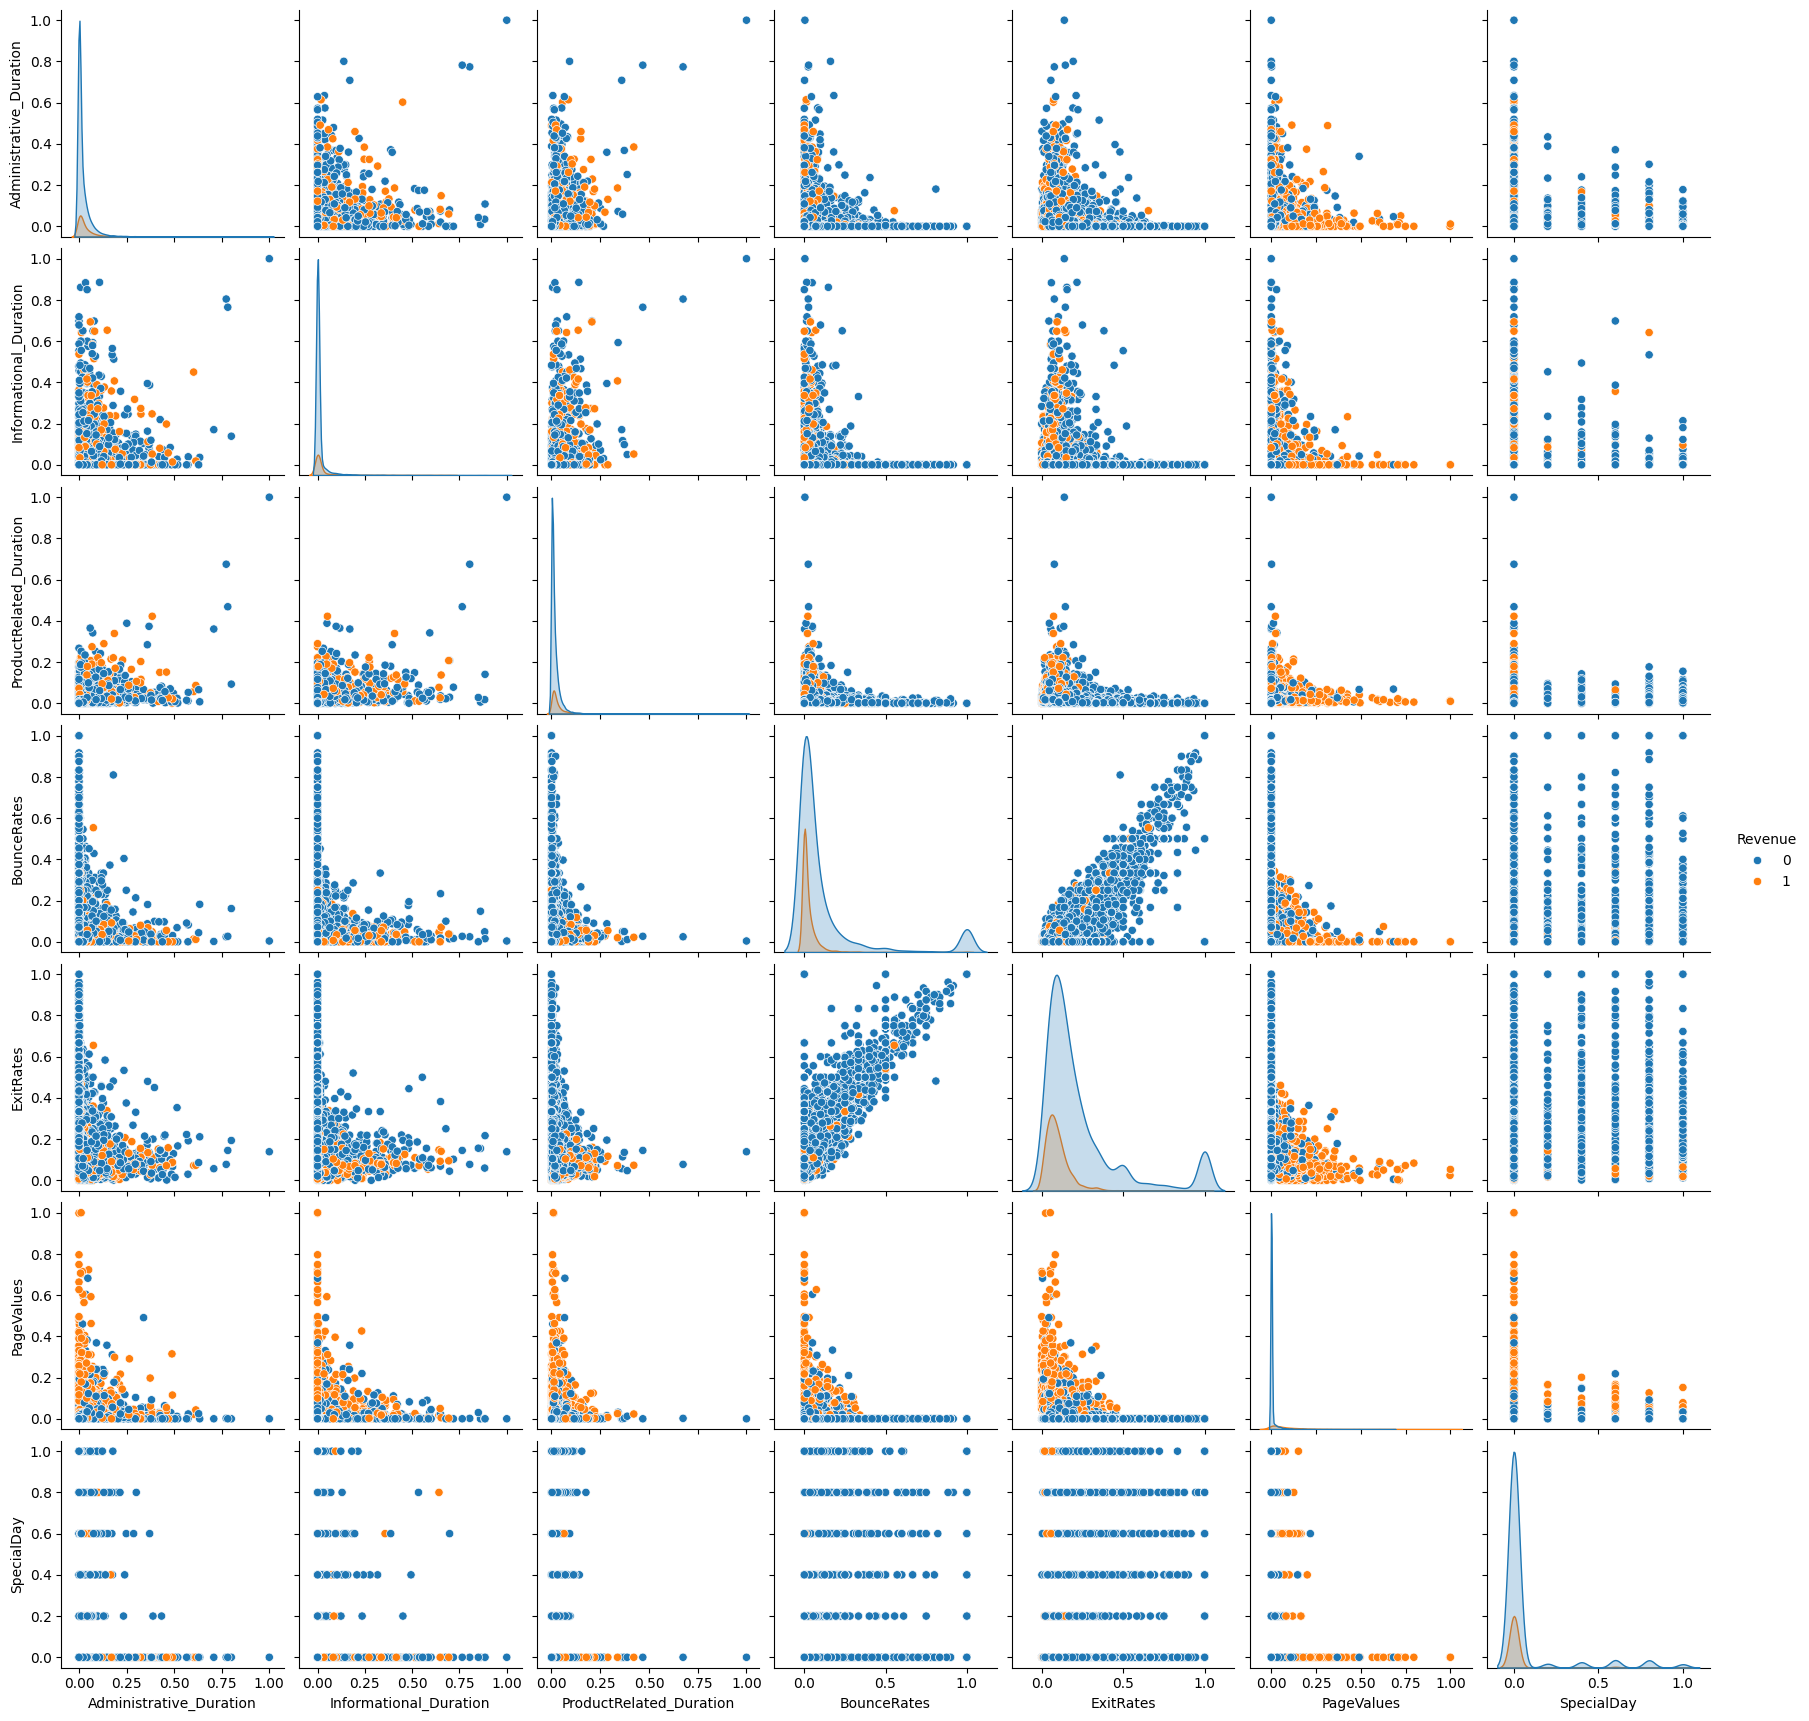

In [28]:
# a paiplot. It shows the correlation by drawing a scatterplot for every pair of attributes
sns.pairplot(dataset, hue='Revenue', vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'])
plt.show()

KeyboardInterrupt: 

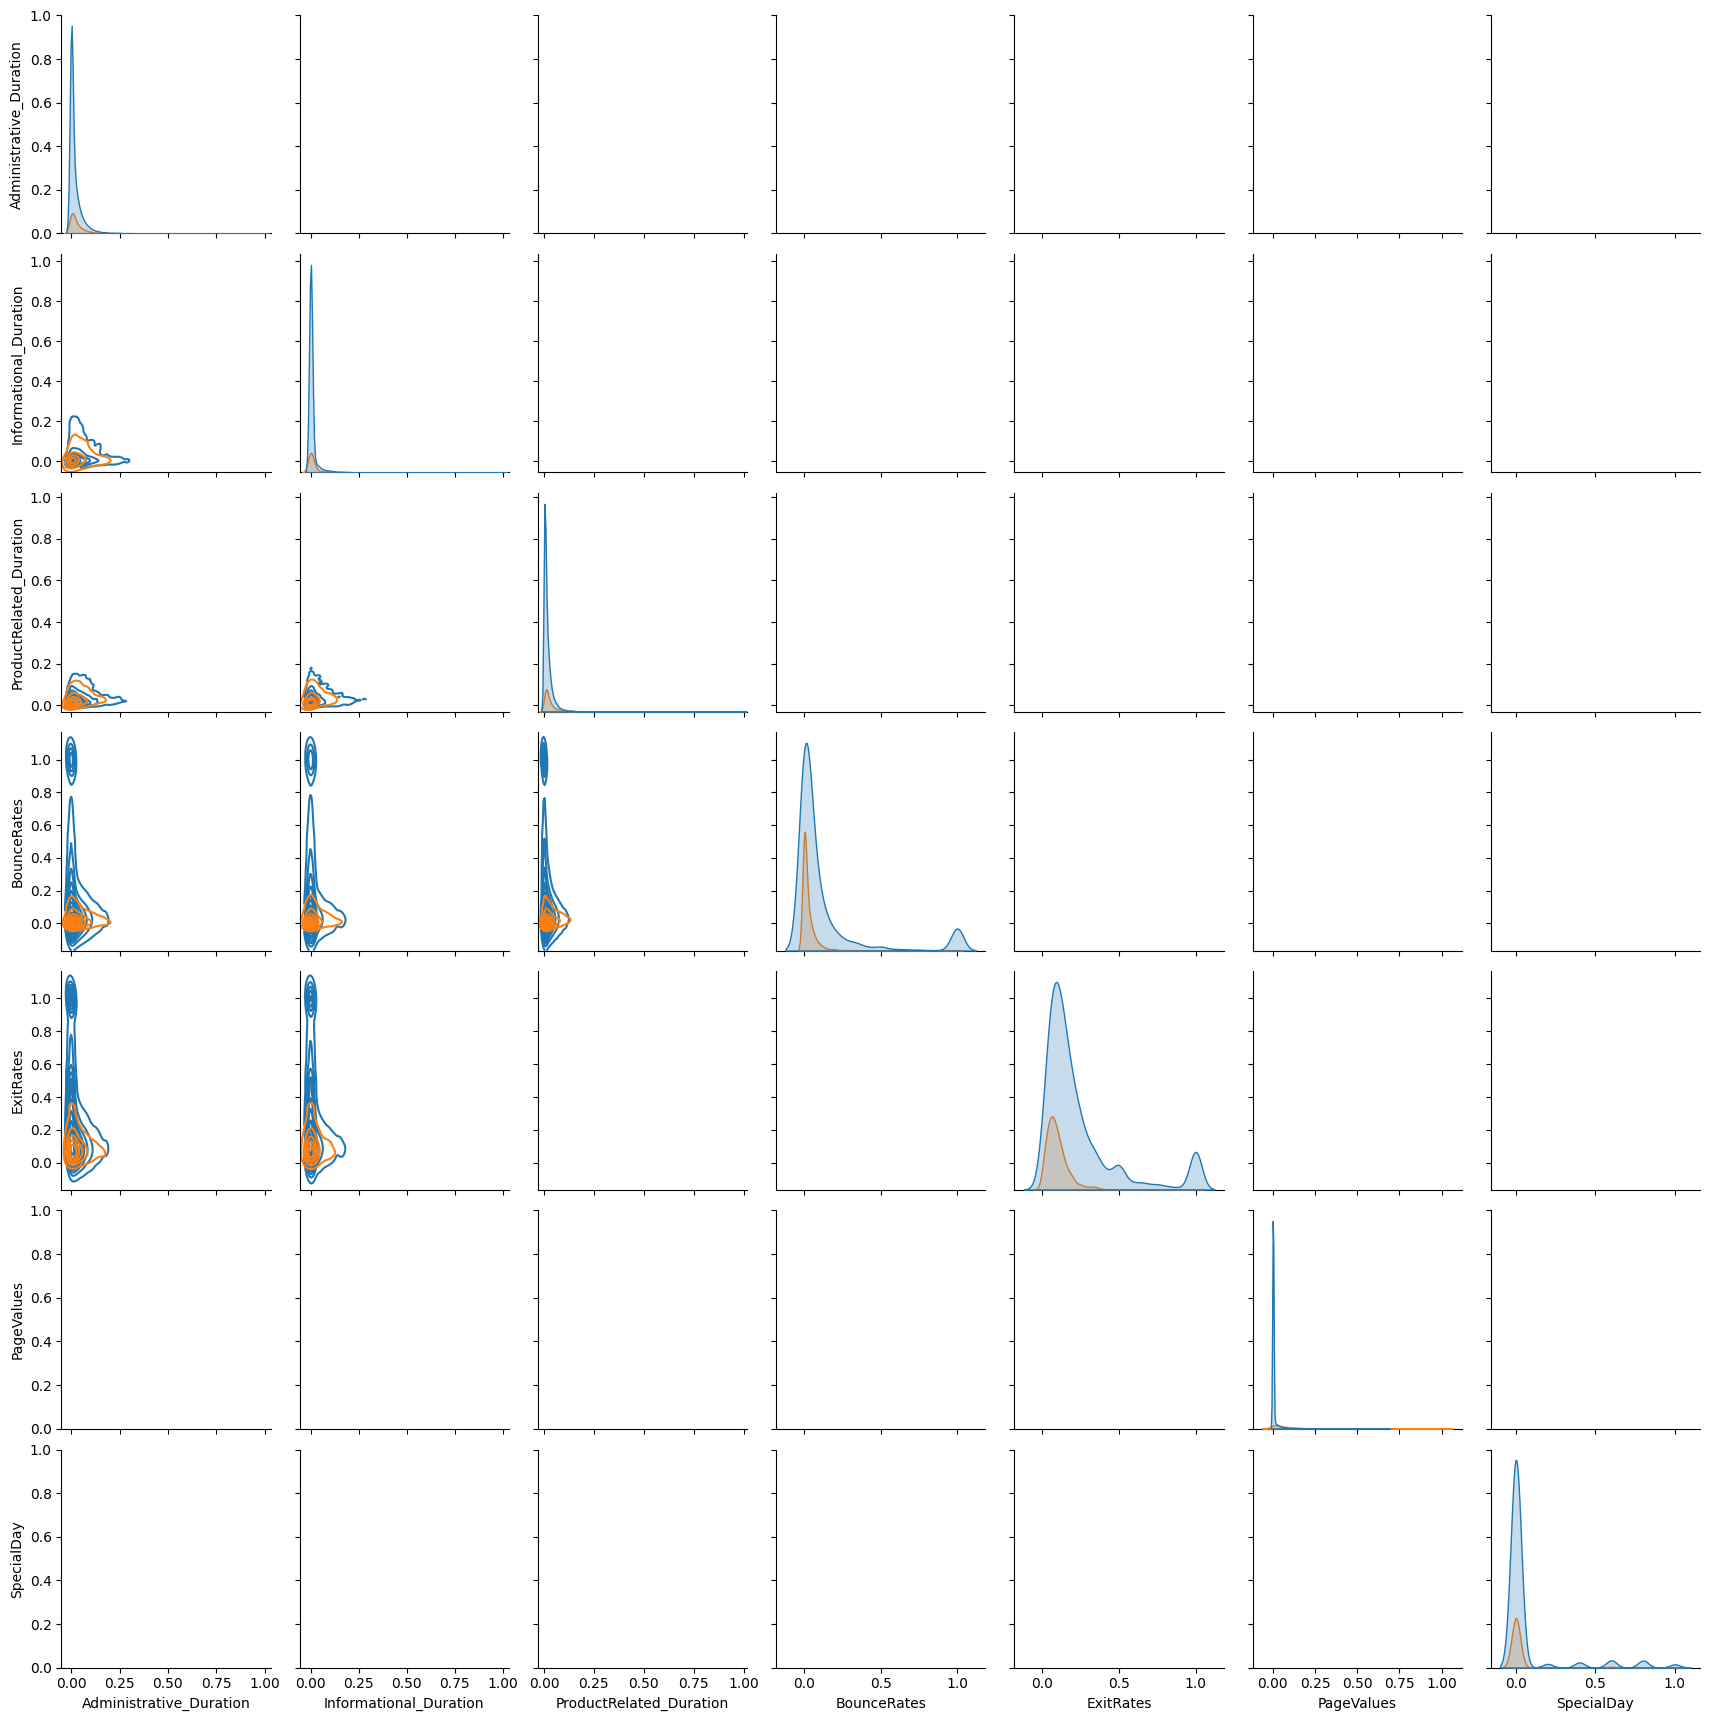

In [29]:
#WARNING: this cell takes a lot of time to execute
# a pairplot with more details

sns.pairplot(dataset, hue='Revenue', vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'], kind = "kde")
plt.show()

Original shape: (12330, 18)
Reduced shape: (12330, 2)


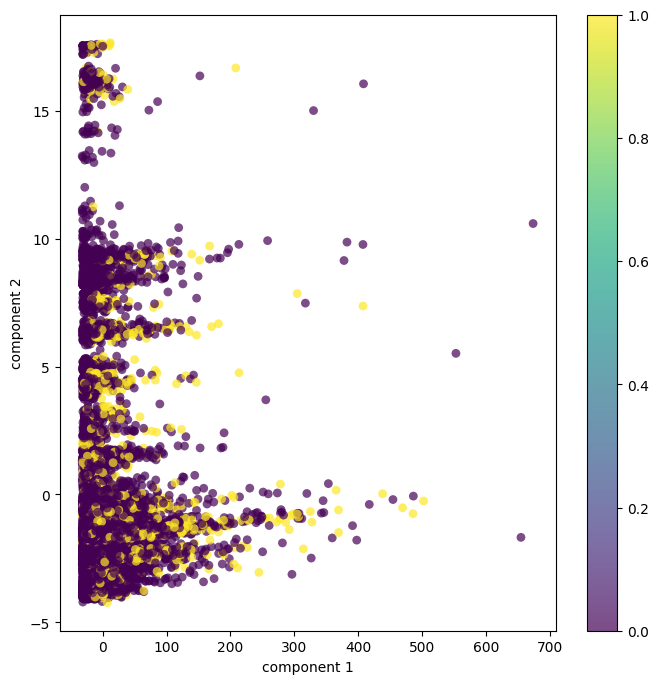

In [30]:
# PCA projection to 2D
# It allows us to see the whole dataset in a 2D plot. Very useful to see if there are clusters
# yellow is revenues, purple is no revenues
from sklearn.decomposition import PCA
#create a dataset containing all the non categorical features
pca = PCA(n_components=2)
pca.fit(dataset)
X_pca = pca.transform(dataset)
print("Original shape: {}".format(str(dataset.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['Revenue'], edgecolor='none', alpha=0.7, s=40)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

# Training

In [31]:
# we are going to use dbscan and kmeans clustering algorithms to search for clusters in the dataset
from sklearn.cluster import DBSCAN, KMeans
dbscan = DBSCAN(eps=0.1, min_samples=5) # problem with the eps value
KMeans = KMeans(n_clusters=2)

dbscanned = dbscan.fit(dataset)
kmeaned = KMeans.fit(dataset)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


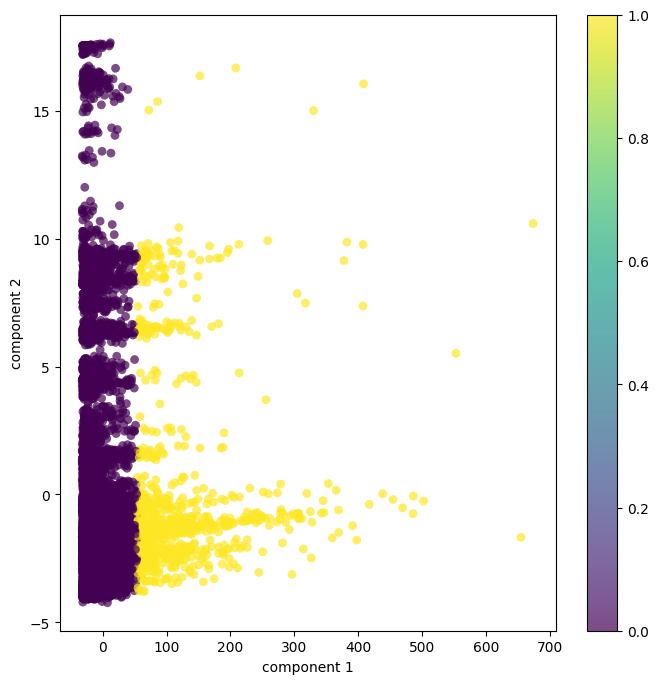

In [33]:
#Kmeans to search for 2 clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset)
# plot the Kmeans clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeaned.labels_, edgecolor='none', alpha=0.7, s=40)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [34]:
np_labels.shape

(12330,)

In [37]:
# Grid Search to find the best parameters for the Logistic Regression model
# Logistic regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#Pretty long to execute

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Grid Search
param_grid = {'C': [i for i in np.arange(1, 10000,10)]}

# Create the Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Create the Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1, verbose=1)

# Fit the Grid Search object to the data
grid_search.fit(np_features, np_labels)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Parameters: {'C': 6971}
Best Score: 0.8806974858069749


In [38]:
best_params = {'C': 6971} # hard coded so that the grid search doesn't run every time
best_score = 0.880

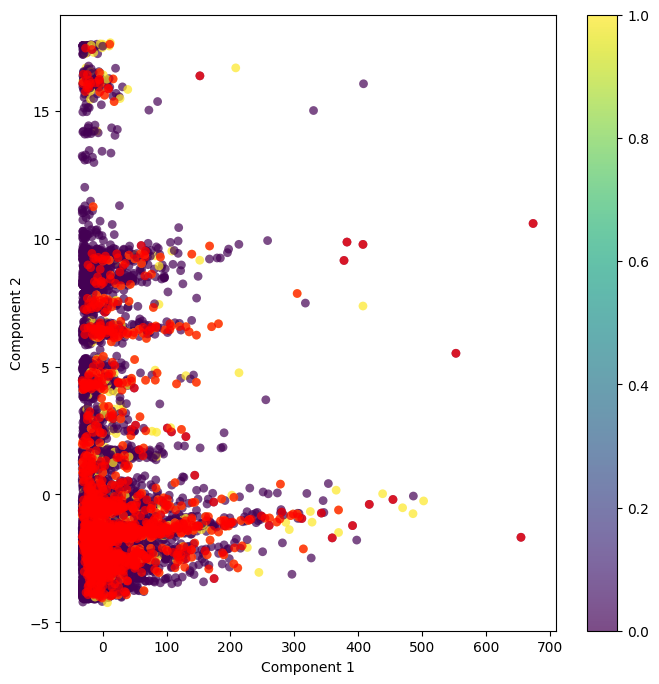

In [39]:
# PCA to see the misclassified points. The misclassified points are the points that are in red. 

# Fit the Logistic Regression model with the best parameter
best_model = LogisticRegression(max_iter=10000, C=best_params['C'])
best_model.fit(np_features, np_labels)

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np_features)

# Predict the labels using the best model
predicted_labels = best_model.predict(np_features)

# Get the indices of the points that are misclassified
misclassified_indices = np.where(predicted_labels != np_labels)[0]

# Plot the misclassified points using PCA in 2 dimensions
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np_labels, edgecolor='none', alpha=0.7, s=40)
plt.scatter(X_pca[misclassified_indices, 0], X_pca[misclassified_indices, 1], c='red', edgecolor='none', alpha=0.7, s=40)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


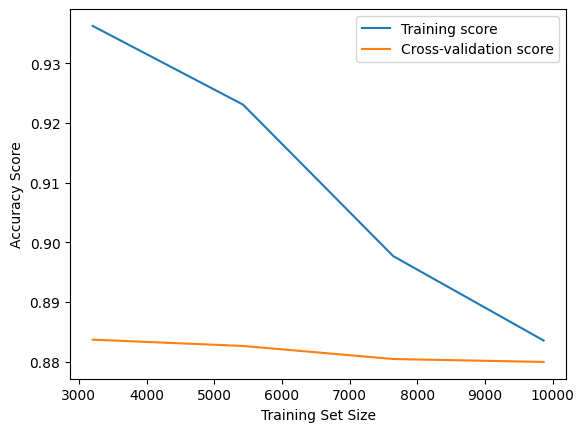

In [48]:
# To see the learning curve of the model Logistic Regression

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, np_features, np_labels, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

Fitting 2 folds for each of 171 candidates, totalling 342 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan 

Best Parameters: {'eps': 0.5, 'min_samples': 1}
Best Score: nan


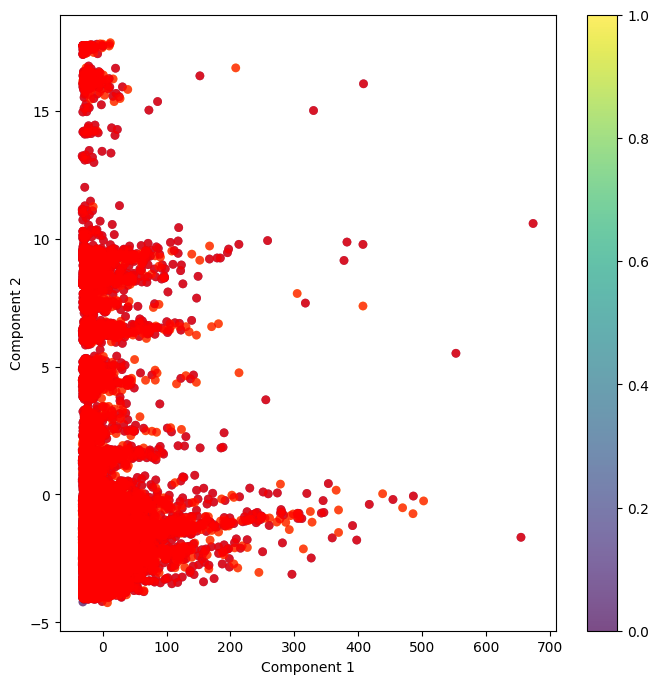

In [42]:
# grid search to optimize dbscan. Objective : having 3 categories
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Define the parameter grid for Grid Search
param_grid = {'eps': [i for i in np.arange(0.5, 10, 0.5)], 'min_samples': [i for i in np.arange(1, 10, 1)]}

# Create the DBSCAN model
model = DBSCAN()

# Create the Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy', return_train_score=True, n_jobs=-1, verbose=1)

# Fit the Grid Search object to the data
grid_search.fit(np_features, np_labels)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Fit the DBSCAN model with the best parameter
best_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_model.fit(np_features)

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np_features)

# Predict the labels using the best model
predicted_labels = best_model.labels_

# Get the indices of the points that are misclassified
misclassified_indices = np.where(predicted_labels != np_labels)[0]

# Plot the misclassified points using PCA in 2 dimensions
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np_labels, edgecolor='none', alpha=0.7, s=40)
plt.scatter(X_pca[misclassified_indices, 0], X_pca[misclassified_indices, 1], c='red', edgecolor='none', alpha=0.7, s=40)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

# Conclusion : DBscan CANNOT be used to find clusters in this dataset. It is not adapted to this dataset

# Bonus : label prediction with Tensorflow

**idea** : We can try to use a neural network to predict the labels of our dataset. We will use the Tensorflow library to do so.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# split the dataset into train and test
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.2, random_state=42)

# create the model

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[17]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# train the model
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=1000
)

Epoch 1/1000
247/247 [==============================] - 1s 1ms/step - loss: 0.4950 - accuracy: 0.8350 - val_loss: 0.4677 - val_accuracy: 0.8434
Epoch 2/1000
247/247 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8426 - val_loss: 0.4441 - val_accuracy: 0.8069
Epoch 3/1000
247/247 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8418 - val_loss: 0.4094 - val_accuracy: 0.8378
Epoch 4/1000
247/247 [==============================] - 0s 991us/step - loss: 0.3879 - accuracy: 0.8446 - val_loss: 0.3901 - val_accuracy: 0.8449
Epoch 5/1000
247/247 [==============================] - 0s 999us/step - loss: 0.3818 - accuracy: 0.8458 - val_loss: 0.3800 - val_accuracy: 0.8469
Epoch 6/1000
247/247 [==============================] - 0s 1000us/step - loss: 0.3655 - accuracy: 0.8521 - val_loss: 0.3640 - val_accuracy: 0.8449
Epoch 7/1000
247/247 [==============================] - 0s 999us/step - loss: 0.3455 - accuracy: 0.8596 - val_loss: 0.3529 - val_

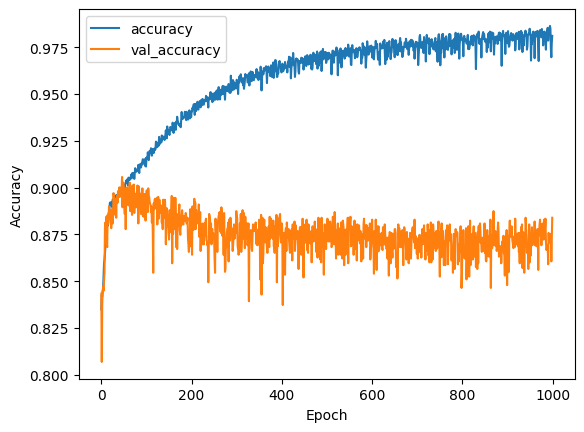

In [25]:
#accuracy : the accuracy of the model on the test set
# val_accuracy : the accuracy of the model on the validation set
# loss : the loss of the model on the training set
# val_loss : the loss of the model on the validation set

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

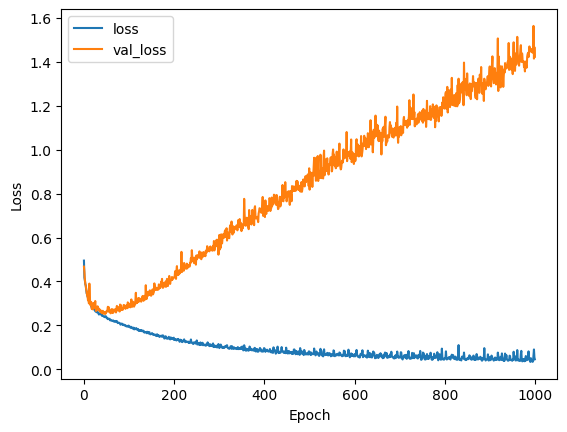

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
# we save the model to use it later
model.save('model.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.2, random_state=42)


# load the model
model = keras.models.load_model('model.h5')

# evaluate the model
test_loss, test_acc = model.evaluate(test_features, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)



78/78 - 0s - loss: 1.9965 - accuracy: 0.8577 - 329ms/epoch - 4ms/step

Test accuracy: 0.8576642274856567


386/386 [==============================] - 0s 583us/step


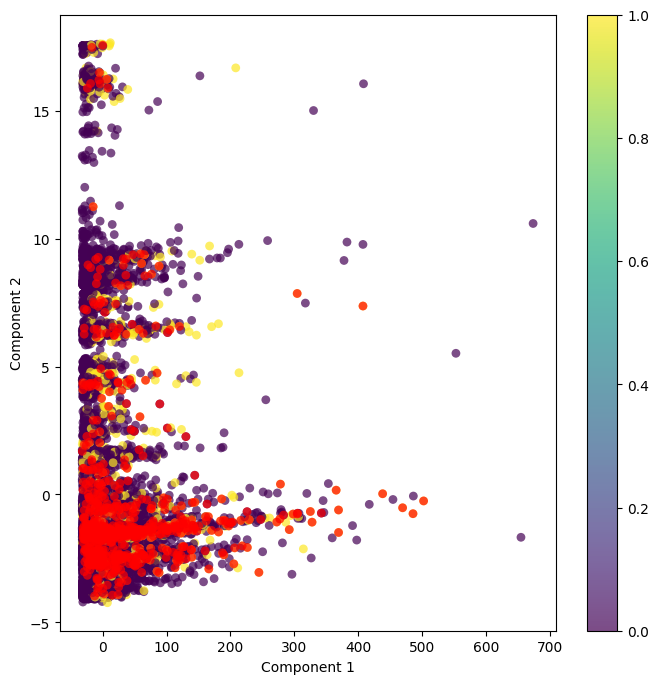

In [44]:
# Comparing the predictions of the model with the actual labels

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np_features)

# Predict the labels using the best model
predicted_labels = [1 if i > 0.5 else 0 for i in model.predict(np_features)]

# Get the indices of the points that are misclassified
misclassified_indices = np.where(predicted_labels != np_labels)[0]

# Plot the misclassified points using PCA in 2 dimensions
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np_labels, edgecolor='none', alpha=0.7, s=40)
plt.scatter(X_pca[misclassified_indices, 0], X_pca[misclassified_indices, 1], c='red', edgecolor='none', alpha=0.7, s=40)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()